In [1]:
#Using insurance.csv , predict the medical insurance cost (charges) for a person based on features like age, BMI, number of children, 
#smoker status, and region.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [52]:
df["smoker"] = df["smoker"].map({"yes": 1, "no": 0})

In [53]:
region_dummies = pd.get_dummies(df["region"])
df = pd.concat([df.drop(columns=["region"]), region_dummies], axis=1)
df.head()

,age,sex,bmi,children,smoker,expenses,northeast,northwest,southeast,southwest
0,19,female,27.9,0,1,16884.92,False,False,False,True
1,18,male,33.8,1,0,1725.55,False,False,True,False
2,28,male,33.0,3,0,4449.46,False,False,True,False
3,33,male,22.7,0,0,21984.47,False,True,False,False
4,32,male,28.9,0,0,3866.86,False,True,False,False


In [54]:
X = df[[ "age", "bmi", "children", "smoker", "northeast", "northwest", "southeast", "southwest"]].to_numpy()
y = df["expenses"].to_numpy().reshape(-1, 1)
X.shape, y.shape

((1338, 8), (1338, 1))

In [56]:
X = X.astype(float)
y = y.astype(float)
beta = np.linalg.pinv(X.T @ X) @ (X.T @ y)
beta

array([[   256.95645123],
       [   338.76094658],
       [   474.75426562],
       [ 23835.24083488],
       [-11993.30933674],
       [-12345.31769642],
       [-13028.24287723],
       [-12951.94009783]])

In [57]:
yhat = X @ beta

In [58]:
m, n = X.shape
beta_predict = np.zeros((n, 1))  
alpha = 0.00001
epochs = 5000

In [59]:
lossx = []

for i in range(epochs):
    yhat = X @ beta_predict
    error = yhat - y
    
    gradient = (2/m) * (X.T @ error)
    beta_predict = beta_predict - alpha * gradient
    loss = np.mean(error ** 2)
    lossx.append(loss)

In [60]:
y_predict = X @ beta_predict

In [61]:
mse = np.mean((y - yhat) ** 2)
mse_predicted = np.mean((y - y_predict) ** 2)
mse, mse_predicted

(127683643.41676012, 127683058.59237589)

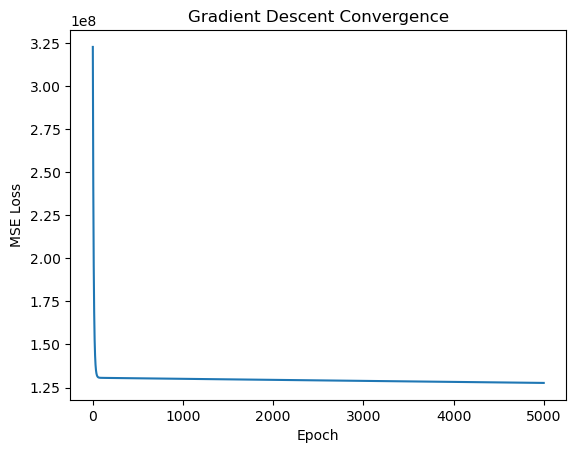

In [62]:
plt.figure()
plt.plot(lossx)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Gradient Descent Convergence")
plt.show()

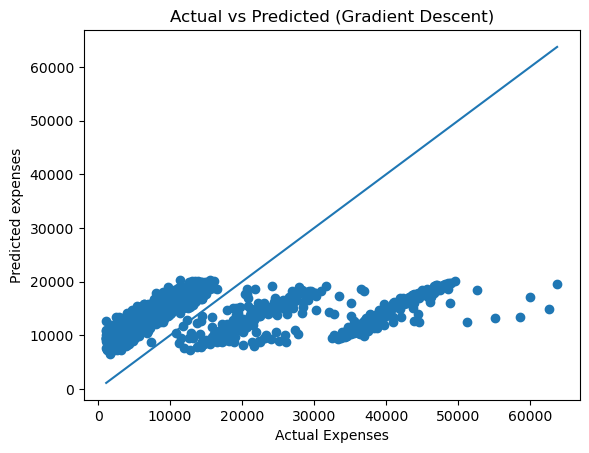

In [63]:
plt.figure()
plt.scatter(y, y_predict)
plt.xlabel("Actual Expenses")
plt.ylabel("Predicted expenses")
plt.title("Actual vs Predicted (Gradient Descent)")
mn = float(min(y.min(), y_predict.min()))
mx = float(max(y.max(), y_predict.max()))
plt.plot([mn, mx], [mn, mx])
plt.show()